In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 2
## Part b)

In [204]:
def create_matrix_eq(U, z):
    A = np.zeros((4, 4))
    Z = np.outer(z, z)
    UTU = np.dot(U, U.T)
    A[:3, :3] = np.multiply(Z, UTU)
    A[3] = np.append(z, 0)
    A[:, 3] = np.append(-z, 0)
    b = np.array([1, 1, 1, 0])
    return A, b

def compute_rho(A, b):
    Ainv = np.linalg.inv(A)
    return np.dot(Ainv, b[:, np.newaxis])

def check_lambda_KKT(rho, z, part_g=False):
    check = np.sum(np.multiply(rho[:3], z))
    if np.all(rho[:3] >= 0) and np.isclose(check, 0):
        return True
    else:
        if part_g:
            return True
        else:
            return False

def recompute_rho(A, b, rho):
    neg_indices = np.where(rho[:3]<0)[0]
    sub_A = np.delete(np.delete(A, neg_indices, axis=1), neg_indices, axis=0)
    sub_b = np.delete(b, neg_indices)
    sub_A_inv = np.linalg.inv(sub_A)
    tmp = np.dot(sub_A_inv, sub_b)
    return np.insert(tmp, neg_indices, 0), neg_indices

def calculate_optimal_weight(rho, z, U, neg_indices=None):
    w_opt = np.sum(U*np.multiply(rho[:3], z)[:, np.newaxis], axis=0)
    inner = np.dot(w_opt[:, np.newaxis].T, U.T).T
    w0_opt = (np.divide(np.ones(z.shape), z)[:, np.newaxis]-inner)[:, 0]
    if neg_indices is not None:
        w0_opt = np.delete((np.divide(np.ones(z.shape), z)[:, np.newaxis]-inner)[:, 0], neg_indices)
    
    KKT_check1 = np.all(np.isclose(w0_opt/np.amax(w0_opt), 1))
    check = z[:, np.newaxis]*(inner+w0_opt[0])-1
    KKT_check2 = (np.isclose(check[0], 0) or check[0] > 0) and (np.isclose(check[1], 0) or check[1] > 0) and (np.isclose(check[1], 0) or check[1] > 0)
    return w_opt, w0_opt[0], KKT_check1, KKT_check2

def check_weight_KKT(KKT_check1, KKT_check2):
    if KKT_check1 and KKT_check2:
        return True
    else:
        return False

def plot_dec_boundaries(w_opt, w0_opt, U, z):
    m = -w_opt[0]/w_opt[1]
    b = -w0_opt/w_opt[1]
    x = np.linspace(-5, 5)
    y = m*x+b
    ax = 4
    ay = m*ax+b
    adx = 1
    ady = -(1/m)*adx
    plt.plot(x, y)
    plt.arrow(ax, ay, adx, ady, shape='full', length_includes_head=True, head_width=0.1)
    for u, z_val in zip(U, z):
        if z_val == 1:
            plt.plot(u[0], u[1], 'rx')
        else:
            plt.plot(u[0], u[1], 'bo')
    
    plt.show()

def output(U, z, part_g=False):
    A, b = create_matrix_eq(U, z)
    rho = compute_rho(A, b).flatten()
    check_lambda = check_lambda_KKT(rho, z)
    neg_indices = None
    if part_g and not np.all(rho[:3] >= 0):
        tmp, tmp_neg = recompute_rho(A, b, rho)
        rho = tmp.copy()
        neg_indices = tmp_neg.copy()
        check_lambda = check_lambda_KKT(rho, z)
    
    w_opt, w0_opt, KKT_check1, KKT_check2 = calculate_optimal_weight(rho, z, U, neg_indices)
    check_weight = check_weight_KKT(KKT_check1, KKT_check2)

    print(f"(i) Lambda = {rho[:3]}, mu = {rho[3]}\n(ii) Satisfies KKT conditions involving lambda: {check_lambda}\n(iii) w* = {w_opt}, w0* = {w0_opt}\n(iv) " +
            f"Satisfies KKT conditions on nonaugmented weight and bias terms: {check_weight}")
    plot_dec_boundaries(w_opt, w0_opt, U, z)

## Part c), d)

(i) Lambda = [0.22222222 0.22222222 0.44444444], mu = 1.0
(ii) Satisfies KKT conditions involving lambda: True
(iii) w* = [0.66666667 0.66666667], w0* = -1.0
(iv) Satisfies KKT conditions on nonaugmented weight and bias terms: True


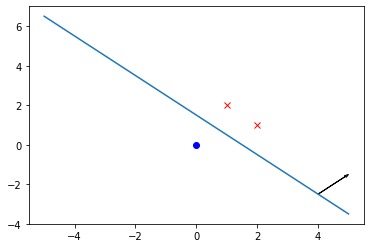

In [205]:
u1 = np.array([1, 2])
u2 = np.array([2, 1])
u3 = np.array([0, 0])
U = np.array([u1, u2, u3])
z = np.array([1, 1, -1])
output(U, z)

## Part e)
### The decision boundary does correctly classify the training data. The maximum-bargin boundary does seem like it will correctly classify the training data. This is because, from a glance at the plot, the points seem far enough away from the decision boundary to be comfortably out of the margin region for most reasonable choices for the value of b.

## Part f)

(i) Lambda = [2. 2. 4.], mu = 5.0
(ii) Satisfies KKT conditions involving lambda: True
(iii) w* = [2. 2.], w0* = -5.000000000000001
(iv) Satisfies KKT conditions on nonaugmented weight and bias terms: True


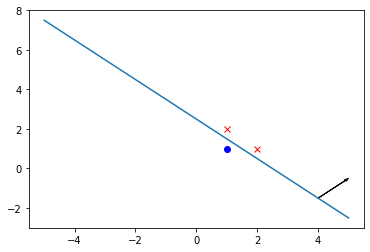

In [206]:
u1 = np.array([1, 2])
u2 = np.array([2, 1])
u3 = np.array([1, 1])
U = np.array([u1, u2, u3])
z = np.array([1, 1, -1])
output(U, z)

### The decision boundary does correctly classify the training data. The maximum-bargin boundary does not seem like it will correctly classify the training data. This is because, from a glance at the plot, the points seem too close to the decision boundary to be comfortably out of the margin region for some reasonable choices for the value of b.
### (iv) The decision boundary has not changed significantly from d) to f). The only difference is that the intercept for the line is different whereas the slope remains the same.

## Part g)
### (i) The boundary will change by some factor because the slope will change relative to f).

(i) Lambda = [1.6 0.  1.6], mu = 2.200000000000001
(ii) Satisfies KKT conditions involving lambda: True
(iii) w* = [1.6 0.8], w0* = -2.200000000000001
(iv) Satisfies KKT conditions on nonaugmented weight and bias terms: True


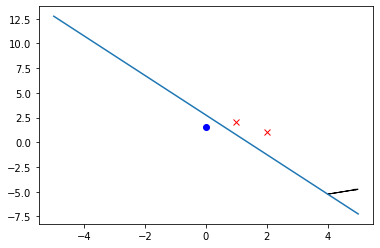

In [207]:
u1 = np.array([1, 2])
u2 = np.array([2, 1])
u3 = np.array([0, 1.5])
U = np.array([u1, u2, u3])
z = np.array([1, 1, -1])
output(U, z, True)

### The decision boundary does correctly classify the training data. The maximum-bargin boundary does not seem like it will correctly classify the training data. This is because, from a glance at the plot, the points seem too close to the decision boundary to be comfortably out of the margin region for some reasonable choices for the value of b.
### (v) The decision boundary has changed because now the slope of the line is -2 as opposed to -1 which was the value for the slope of the decision line in parts d) and f). Furthermore, the intercept has also changed.